# Optimisation Convexe : Solveur SVM

Josselin GIET

## Notation

### Quelques éléments sur la log-barrière 

Soit

$$
  f : x \mapsto -\sum_{i= 1}^m log(b_i-a_i^T x)
$$
la fonction de barière analytique.

Cette fonction est $\mathcal{C}^\infty$ sur $\text{dom}(f) = \{x| Ax < b\}$.

Et ses dérivées partielles à l'ordre 1 valent :
  $\forall k \in [1,n] ,\ \forall x\in \text{dom}(f),$

$$
  \frac{\partial f}{\partial x_k}(x) =
  \sum_{i= 1}^n \frac{a_{ik}}{b_i - a_i^T x}
$$

Donc son gradient vaut : $\forall x\in \text{dom}(f),$

$$
  \nabla f(x) = \sum_{i= 1}^m \frac{a_{i}}{b_i - a_i^T x} = A^T d
$$

où :

$$
d :=
    \left(
    \begin{array}{c}
    \frac{1}{b_1 -a_1^T x}\\
    \vdots\\
    \frac{1}{b_m -a_m^T x} \\
    \end{array}
    \right)
$$

De même les dérivées partielles d'ordre 2 sont bien définies :
$\forall k,l \in [1,n],\ \forall x\in \text{dom}(f),$

$$
  \frac{\partial^2 f}{\partial x_k x_\ell}(x) =
    \sum_{i= 1}^m \frac{a_{ik} a_{i\ell}}{(b_i - a_i^T x)^2}
$$

Et donc sa hessienne vaut : $\forall x \in \text{dom}(f)$,

$$
  \nabla^2 f(x) = A^T diag(d^2) A
$$

D'où le code python :

Dans le cas où

$$
\phi_t : x \mapsto c^Tx -\frac{1}{t}\sum_{i=0}^m log(b_i-a_i^T x)
$$

Cette fonction est $\mathcal{C}^\infty$
sur $\text{dom}(\phi) = \{x| Ax < b\}$,
et son gradient vaut : $\forall x\in \text{dom}(\phi),$

$$
  \nabla f(x) =c + \frac{1}{t}\sum_{i= 1}^m \frac{a_{i}}{b_i - a_i^T x}
    = c+ \frac{1}{t} A^T d
$$

Et sa hessienne vaut : $\forall x \in \text{dom}(\phi)$,

$$
  \nabla^2 \phi(x) = \frac{1}{t}A^T diag(d^2) A
$$


### Mise en place du problème de SVM

Soient :
- $(x_i)_{1\leq i\leq m}$ une famille de points de $\mathbb{R}^n$
- $(y_i)_{1\leq i\leq m}$ une famille de labels dans $\{-1,1\}$
- $C \in \mathbb{R}_+^*$

Le problème de la SVM s'écrit :

$$
\begin{array}{cl}
\textrm{mimimiser} & f(w,z) := \frac{1}{2} ||w||_2^2 + C 1^T z \\
w \in \mathbb{R}^n, \ z\in \mathbb{R}^m & \\
\textrm{tel que} & y_i(w^T x_i) \geq 1-z_i,\ \ \ i = 1,\dots,m \\
    & z \geq 0
\end{array}
$$

En posant :
$$
s := \left[
\begin{array}{c}
w \\ z
\end{array}
\right]
h_0 := \left[
\begin{array}{c}
1 \\ 0
\end{array}
\right]
h_1 := \left[
\begin{array}{c}
0 \\ 1
\end{array}
\right]$$

$$
X_i := -\left[
\begin{array}{c}
  \\ y_i x_i \\   \\ 0 \\ \vdots \\ 1 \\ 0 \\ \vdots
\end{array}
\right]
Y_i := -\left[
\begin{array}{c}
  \\ 0 \\   \\ 0 \\ 0 \\ 1 \\ 0 \\ \vdots
\end{array}
\right]
$$

Le problème se réécrit de la manière suivante : 

$$
\begin{array}{cl}
\textrm{mimimiser} & f(s) := \frac{1}{2} ||h_0*s||_2^2 + C h_1^T \cdot s \\
s \in \mathbb{R}^{n+2m} & \\
\textrm{tel que} & (-1) -X_i^T s \geq 0, \ \  i =  1\dots m \\
    & 0-Y_i^T s \geq 0, \ \  i =  1\dots m
\end{array}
$$

En posant 
$$
A := \left[
\begin{array}{c}
    X_1^T \\ \vdots \\ X_m^T \\ Y_1^T \\ \vdots \\ Y_m^T 
\end{array}
\right]
\ \ \ 
b := \left[
\begin{array}{c}
    -1 \\ \vdots \\ -1 \\ 0 \\ \vdots \\ 0 
\end{array}
\right]
$$

Le problème se réécrit sous la forme canonique : 


$$
\begin{array}{cl}
\textrm{mimimiser} & f(s) := \frac{1}{2} ||h_0*s||_2^2 + C h_1^T \cdot s \\
\textrm{tel que} & b - A s \geq 0 \\
    \end{array}
$$

où $*$ désigne la multiplication coordonées par coordonées (qui correspond à l'opérateur $\texttt{*}$ en Python).

Le gradient de la fonction à minimiser vaut : 

$$
\nabla f(s) = h_0 * s + C h_1
$$

Et sa hessienne : 
$$
\nabla^2 f(s) = h_0^T h_0
$$

### Résolution du Dual

Le problème dual de la SVM s'écrit : 

$$
\begin{array}{cl}
\textrm{maximiser} & g(\alpha) := 
    -\frac{1}{2} \alpha^T S \alpha + \textbf{1}^T \alpha \\
\alpha \in\mathbb{R}^m & \\
\textrm{tel que} & 0 \leq \alpha \leq C \\
\end{array}
\ \ \ \ \ 
(\mathcal{D})
$$

où : 
$S := \textbf{diag}(y) X^T X \textbf{diag}(y)$

Pour résoudre ce problème on va utiliser le fait suivant : 

$$
\alpha_0 \in\arg\max_{0\leq\alpha\leq C} g(\alpha) 
    \Leftrightarrow 
\alpha_0 \in\arg\min_{0\leq\alpha\leq C} -g(\alpha) 
$$

On cherche donc à résoudre le problème d'optmisation convexe suvant : 

$$
\begin{array}{cl}
\textrm{minimiser} & g^*(\alpha) := 
    +\frac{1}{2} \alpha^T S \alpha - \textbf{1}^T \alpha \\
\alpha \in\mathbb{R}^m & \\
\textrm{tel que} & b^d-A^d\alpha \geq 0 \\
    \end{array}
\ \ \ \ \ 
(\mathcal{D^*})
$$

où : 

$$
A^d = \left[\begin{array}{c}
-I_m \\ I_m
\end{array}
\right] 
\ \ \ \ 
b^d = \left[\begin{array}{c}
0 \\ C
\end{array}
\right] 
$$

Il vient alors : 

$$
\nabla g^*(\alpha) = S \alpha - \textbf{1}
$$

$$
\nabla^2 g^*(\alpha) = S 
$$

## Code

### Quelques importations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit as it
from sklearn import svm
plt.rcParams["figure.figsize"] = (5,5)

### Fonction d'initialisation

In [2]:
def getModel(x,y,C):
    """Returns A, b, h0, Ch1 corespondong to standard model"""
    n = x.shape[1] # dimension des points
    m = x.shape[0] # nombre de points: en vrai, c'est m/2 (où m est le nombre de contraintes)
    
    # Calcul pourt le primal
    b = np.array([[-1] for i in range(m)]+[[0] for i in range(m)])
    A = np.concatenate((-x*y,np.zeros((m,m))),axis=1)
    A = np.concatenate((A,np.zeros((m,m+n))))
    h0 = np.concatenate((np.ones((n,1)), np.zeros((m,1))), axis = 0)
    Ch1 = C*np.concatenate((np.zeros((n,1)), np.ones((m,1))), axis = 0)
    for i in range(m): # Opti possible: np.eyes
        A[i,i+3] = -1
        A[i+m,i+3] = -1
    
    # Calcul pour le dual
    XX = np.dot(x,x.T)
    dy = np.diag(np.reshape(y,(m)))
    S = np.dot(dy, np.dot(XX, dy))
    Ad = np.concatenate((-np.eye(m),np.eye(m)))
    bd = np.concatenate((np.zeros((m,1)),C*np.ones((m,1))))
    return (A, b, h0, Ch1, S, Ad, bd)

def getFeasible(x,y):
    """Returns a feasible point s_0"""
    n = x.shape[1] # dimension des points
    m = x.shape[0] # nombre de points : en vrai, c'est m/2 (où m est le nombre de contraintes)
    w_0 = np.ones((n,1))
    z = np.zeros((m,1))
    for i in range(m):
        z[i,0] = max(10, -y[i,0]*np.dot(x[i,:],w_0)+10)
    return np.concatenate((w_0,z))

def getFeasibleDual(x,y,C):
    m = x.shape[0]
    if C <= 0:
        print("Paramètre C incorrect !")
        return
    return C/2*np.ones((m,1))

### Fonctions annexes pour la log barrière

In [3]:
def is_feasible(A,b,s):
    """Check if x is in dom(f)
    i.e b-Ax > 0""" 
    for i in range(len(b)):
        if b[i,0] - np.dot(A[i,:],s) <= 0:
            return False
    return True

def compute_log_barr(A,b,s):
    """compute the barrier. 
    Fail if x is not in dom(f)"""
    res = 0
    for i in range(len(b)):
        res -= np.log(b[i]-np.dot(A[i],s))
    return res

### Fonctions annexes pour le primal

In [4]:
def compute_f(s,h0,Ch1):
    return (0.5*np.linalg.norm(h0*s)**2 + np.dot(Ch1.T, s))[0,0]

def compute_phi(A,b,t,s,h0,Ch1):
    """ Compute the function to minimise and the barrier/t"""
    return compute_log_barr(A,b,s)/t + compute_f(s, h0, Ch1)

In [5]:
def newton(A,b,s_0,h0,Ch1,t=1,prnt=False,eps=10**(-10)):
    """ This function performs the newton algorithm with the log-barrier"""
    # sanity check
    if not is_feasible(A,b,s_0):
        print("La fonction Newton a recu un point non réalisable !")
        return 1
    m, n = A.shape
    beta = 0.75
    s = s_0
    f_s = compute_phi(A,b,t,s,h0,Ch1)
    S = [s]
    lamb = 1
    #print("Dans newton : "+str(s.shape))
    while (lamb)/2 >= eps:
        d = np.zeros(m)
        for i in range(m):
            d[i] = 1/(b[i]-np.dot(A[i],s))
        D = np.array([1/(b[i]-np.dot(A[i],s)) for i in range(n)])
        grad = np.reshape(np.dot(A.T, d)/t,(n,1))\
            + h0*s + Ch1
        hess = np.dot(A.T,np.dot(np.diag(d**2),A))/t \
            + np.dot(h0,h0.T)
        Dx = -np.linalg.solve(hess,grad)
        t_back = 1
        #print(" P : iminue t à cause de feasible")
        while not is_feasible(A, b, s+t_back*Dx):
            t_back *= beta
        #print(" P : diminue t à cause de opti")
        while compute_phi(A, b, t, s+t_back*Dx, h0, Ch1) > f_s:
            t_back *= beta
        #print("P : On est passé")
        lamb = np.dot(grad.transpose(),-Dx)
        s = s+t_back*Dx
        f_s = compute_phi(A, b, t, s, h0, Ch1)
        S += [s]
    
    # Le reste n'est qu'affichage
    if prnt:
        if n == 2:
        #Si on est en dimension deux,
        #alors on peut afficher la trajectoire du point
            plt.plot([x[0] for x in X],[x[1] for x in X],'o-')
            plt.show()
        D = [np.linalg.norm(x_i -x) for x_i in X]
        plt.semilogy(D)
        plt.ylabel("$||x-x^*||$")
        plt.xlabel("nb de pas")
        plt.show()
        f_star = compute_log_barr(A,b,x)
        F = [np.abs(f_star-compute_f(A,b,x_1)) for x_1 in X]
        plt.semilogy(F)
        plt.ylabel('$|f - f^*|$')
        plt.xlabel("nb de pas")
        plt.show()
    return s

### Fonctions annexes pour le dual

In [6]:
def compute_g_star(α, S):
    return 0.5*np.dot(np.dot(α.T, S), α)[0,0] - np.sum(α)

def compute_g(α, S):
    return -compute_g_star(α, S)

def compute_psi(A, b, t, α, S):
    """ Compute the function to minimise and the barrier/t"""
    return compute_log_barr(A, b, α)/t + compute_g_star(α, S)

In [7]:
def newtonDual(A, b, α_0, S, t=1, prnt=False, eps=10**(-10)):
    #print("Appel newtonDual")
    """ This function performs the newton algorithm with the log-barrier"""
    # sanity check
    if not is_feasible(A,b,α_0):
        print("La fonction Newton a recu un point non réalisable !")
        return 1
    # m : condition
    # n : dimension
    m, n = A.shape
    β = 0.75
    α = α_0
    g_α = compute_psi(A, b, t, α, S)
    Alpha = [α]
    lamb = 1
    #print("Dans newton : "+str(s.shape))
    while (lamb)/2 >= eps:
        d = np.zeros(m)
        for i in range(m):
            d[i] = 1/(b[i]-np.dot(A[i],α))
        D = np.array([1/(b[i]-np.dot(A[i],α)) for i in range(n)])
        grad = np.reshape(np.dot(A.T, d)/t,(n,1)) \
            + np.dot(S, α) - np.ones((n,1)) 
        hess = np.dot(A.T,np.dot(np.diag(d**2),A))/t \
            + S
        Dx = -np.linalg.solve(hess,grad)
        t_back = 1
        #print("diminue t à cause de feasible")
        while not is_feasible(A, b, α+t_back*Dx):
            t_back *= β
        #print("diminue t à cause de opti")
        while compute_psi(A, b, t, α+t_back*Dx, S) > g_α:
            t_back *= β
        #print("on est passé")
        lamb = np.dot(grad.T,-Dx)
        α = α + t_back*Dx
        g_α = compute_psi(A, b, t, α, S)
        Alpha += [α]
    
    # Le reste n'est qu'affichge
    # Attention ! Les affichages se font bien sur le dual (D)
    # et non pas sa version modifiée (D*)
    if prnt:
        if n == 2:
        #Si on est en dimension deux,
        #alors on peut afficher la trajectoire du point
            plt.plot([α[0] for α in Alpĥa],[α[1] for α in Alpha],'o-')
            plt.show()
        D = [np.linalg.norm(α_i -α) for α_i in Alpha]
        plt.semilogy(D)
        plt.ylabel("$||α-α^*||$")
        plt.xlabel("nb de pas")
        plt.show()
        g_star = compute_g(S, α)
        G = [np.abs(f_star-compute_g(S, α)) for α_1 in Alpha]
        plt.semilogy(G)
        plt.ylabel('$|g - g^*|$')
        plt.xlabel("nb de pas")
        plt.show()
    return α

In [8]:
def solveLP(A, b, s_0, h0, Ch1, Ad, bd, α_0, S, eps=10**(-5),prnt = False):
    # Sanity check
    if not is_feasible(A,b,s_0):
        print("La fonction solveLP a recu un point non réalisable !")
        return 1
    # Définition des paramètres
    mu = 15
    t = 1
    β = 0.75
    n,p = A.shape
    m = n
    # Initilisation pour le primal
    s_star = s_0
    S_star = [s_star]
    f_s = compute_f(s_star,h0,Ch1)
    # Initialisation pour le dual
    α_star = α_0
    A_star = [α_star]
    g_α = compute_g(α_star, S)
    #while(m/t>= eps):
    while (np.abs(f_s-g_α) > eps):
        # Calcul pour le primal
        s_star = newton(A,b,s_star,h0,Ch1,t,False,eps)
        f_s = compute_f(s_star,h0,Ch1)
        S_star += [s_star]
        
        # Calcul pour le dual
        α_star = newtonDual(Ad, bd, α_star, S, t,False, eps)
        g_α = compute_g(α_star, S)
        A_star += [α_star]
        
        t *= mu
    
    print("Convergence atteinte")
    f_star = compute_f(s_star, h0, Ch1)
    g_star = compute_g(α_star, S)
    
    # Le reste n'est qu'affichage
    if prnt:
        plt.subplot(1,3,1)
        P = [np.linalg.norm(s_i -s_star) for s_i in S_star]
        D = [np.linalg.norm(α_i -α_star) for α_i in A_star]
        plt.semilogy(P,'o',label="$\mathcal{P}$")
        plt.semilogy(D,'o',label="$\mathcal{D}$")
        plt.legend()
        plt.ylabel("$||x-x^*||$")
        plt.xlabel("nb de pas")
        #plt.show()
        
        plt.subplot(1,3,2)
        F = [np.abs(f_star-compute_f(s, h0, Ch1)) for s in S_star]
        G = [np.abs(g_star-compute_g(α, S)) for α in A_star]
        plt.semilogy(F,'o', label="$\mathcal{P}$")
        plt.semilogy(G,'o', label="$\mathcal{D}$")
        plt.legend()
        plt.ylabel('$|f(g) - f^*(g^*|$')
        plt.xlabel("nb de pas")
        #plt.show()
        
        plt.subplot(1,3,3)
        plt.plot([i for i in range(len(S_star))][1::] ,[compute_f(s, h0, Ch1) for s in S_star][1::],label="$f$")
        plt.plot([i for i in range(len(A_star))][1::] ,[compute_g(α, S) for α in A_star][1::],label="$g$")
        plt.legend()
        plt.ylabel('$f(g) $')
        plt.xlabel("nb de pas")
        plt.show()


    return s_star,f_star

def get_class(x, y, C, prnt = False):
    """Returns w a classifieur"""
    A, b, h0, Ch1, S, Ad, bd = getModel(x,y, C)
    s_0 = getFeasible(x,y)
    α_0 = getFeasibleDual(x,y,C)
    s_star,f_star = solveLP(A, b, s_0, h0, Ch1, Ad, bd, α_0, S, prnt = prnt)
    w = s_star[0:3,:]
    return w

## Les Benchs

### Tirage des données

In [9]:
# On tire des données au hasard : 
def R(θ):
    """Renvoie la matrice de rotation θ en 2D"""
    return np.array([[np.cos(θ),-np.sin(θ)],
                   [np.sin(θ), np.cos(θ)]])


def tirerBench(m, σ, μ0, μ1, Σ0, Σ1, prnt = False):
    """Tire les données selon des vecteurs gaussiens N(μ_i,Σ_i)"""
    m0 = int(np.random.normal(m/2,m/10)) 
    # on sélectionne le nombre de points dans chaque jeu aléatoirement
    m1 = m - m0
    x0 = np.array([np.random.normal(μ0,σ) for i in range(m0)])
    x0 = np.array([np.dot(xi-μ0,Σ0) +μ0 for xi in x0])
    x1 = np.array([np.random.normal(μ1,σ) for i in range(m1)])
    x1 = np.array([np.dot(xi-μ1,Σ1) +μ1 for xi in x1])
    #On affiche les données : 

    if prnt:
        plt.scatter(x0[:,0],x0[:,1],s=5,color="blue",label="label -1")
        plt.scatter(x1[:,0],x1[:,1],s=5,color="green",label="label 1")
        plt.legend()
        plt.show()

    x = np.concatenate((x0,x1))
    x = np.concatenate((x,np.ones((m,1))),axis=1) 
    # On rajoute un 1 pour l'offset
    # yaux = np.ones((m,1))
    y = np.concatenate((-np.ones((m0,1)),np.ones((m1,1))))
    
    return x,y,x0,x1
    

m = 100 :

classifieur SVM perso
---------------------
Convergence atteinte


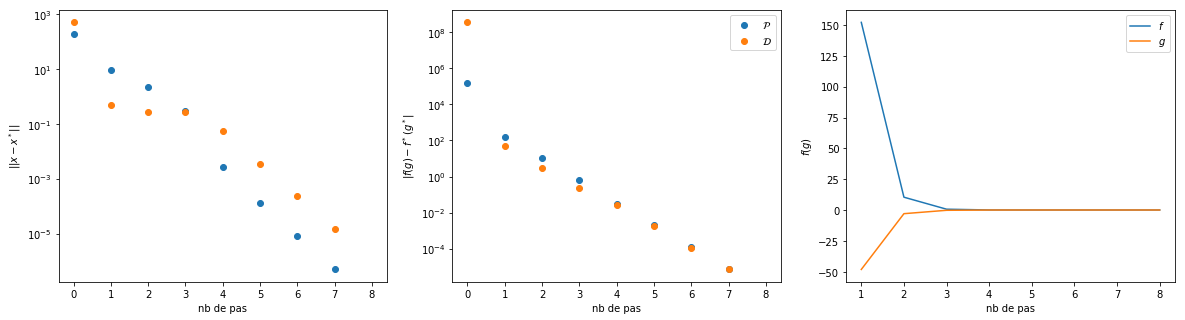

CPU times: user 4.48 s, sys: 6.44 s, total: 10.9 s
Wall time: 3.64 s
Le score est 1.0

classifieur SVM libstd
----------------------
CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 782 µs
Le score est 1.0

Comparaison
-----------
||w-wSK|| = 0.0001940017682


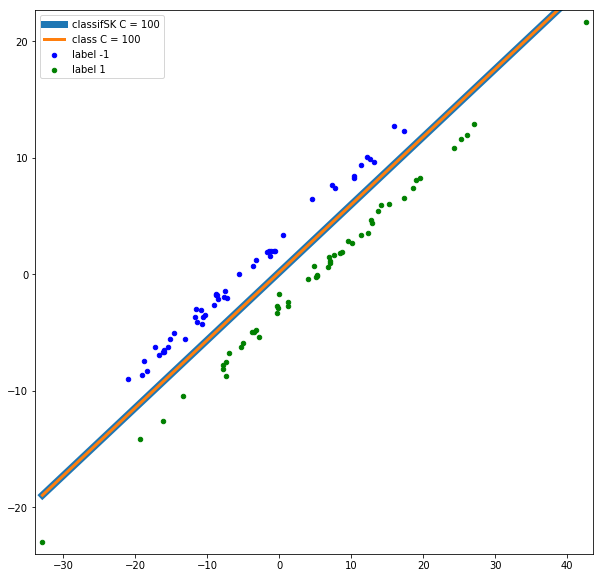

m = 200 :

classifieur SVM perso
---------------------
Convergence atteinte


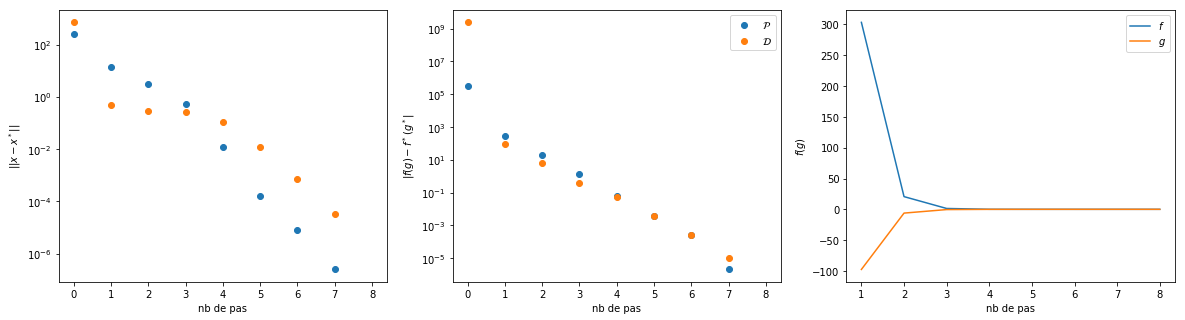

CPU times: user 6.44 s, sys: 9.55 s, total: 16 s
Wall time: 4.98 s
Le score est 1.0

classifieur SVM libstd
----------------------
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 4.73 ms
Le score est 1.0

Comparaison
-----------
||w-wSK|| = 6.89235347705e-06


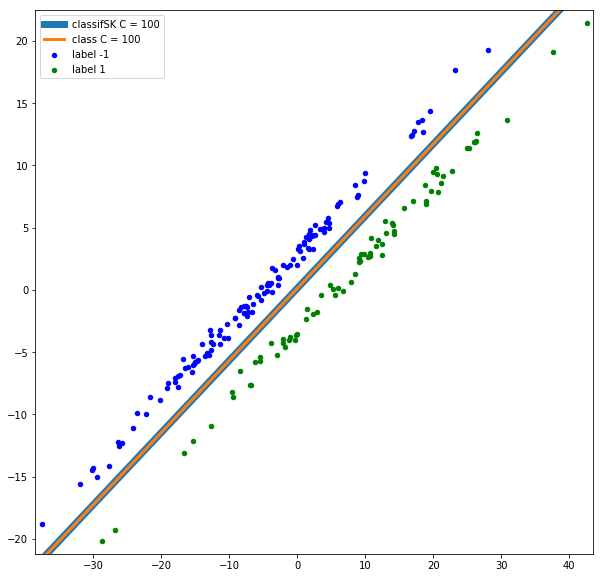

m = 300 :

classifieur SVM perso
---------------------
Convergence atteinte


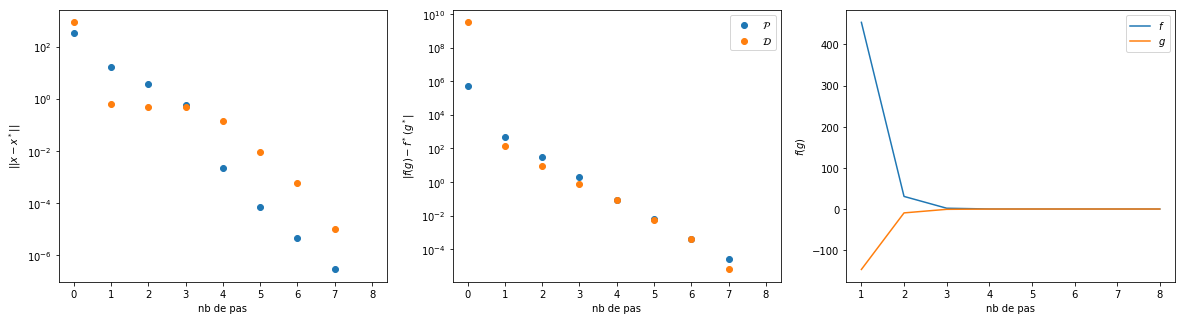

CPU times: user 17.3 s, sys: 20.8 s, total: 38.1 s
Wall time: 11.2 s
Le score est 1.0

classifieur SVM libstd
----------------------
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.4 ms
Le score est 1.0

Comparaison
-----------
||w-wSK|| = 0.000294613744971


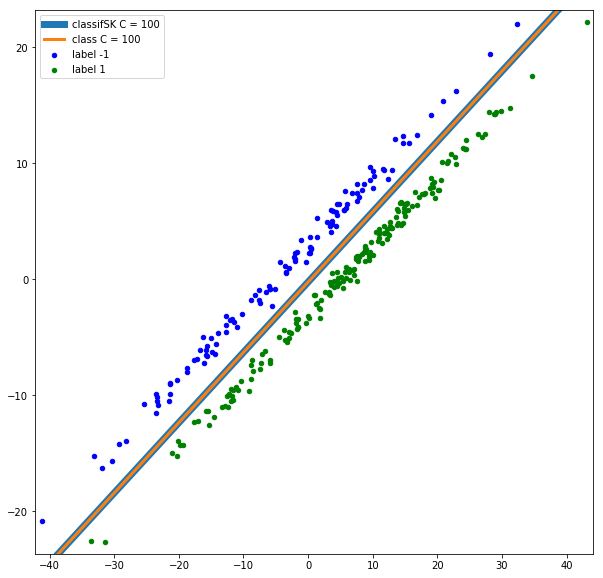

m = 400 :

classifieur SVM perso
---------------------
Convergence atteinte


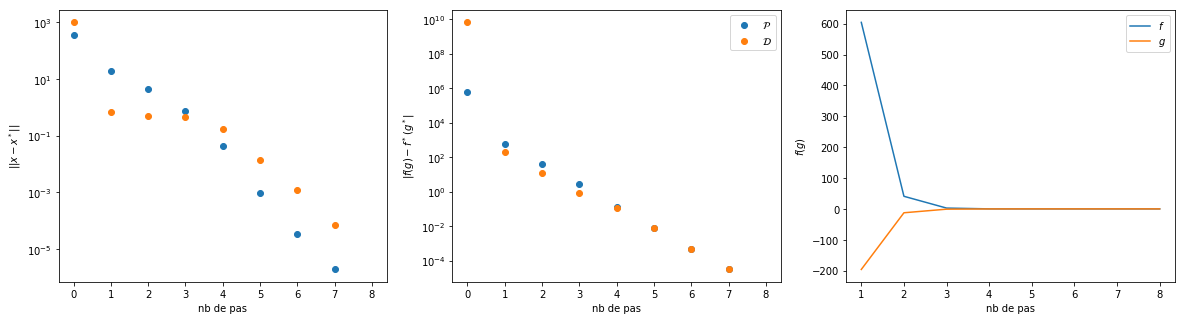

CPU times: user 19.7 s, sys: 20 s, total: 39.6 s
Wall time: 11.8 s
Le score est 1.0

classifieur SVM libstd
----------------------
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 2.23 ms
Le score est 1.0

Comparaison
-----------
||w-wSK|| = 0.000454532140521


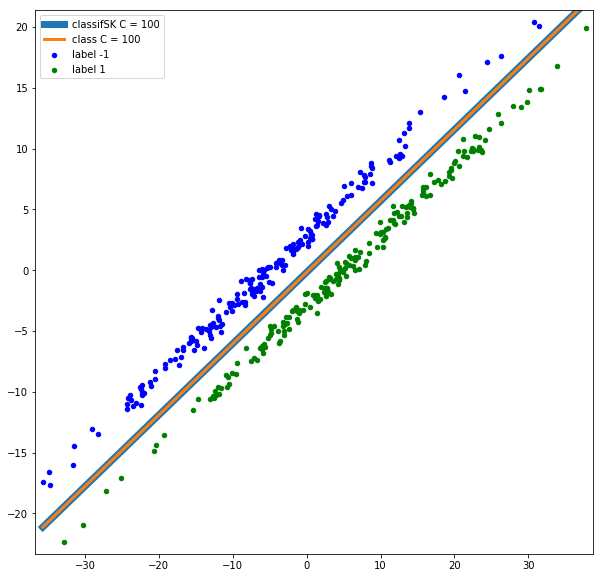

m = 500 :

classifieur SVM perso
---------------------
Convergence atteinte


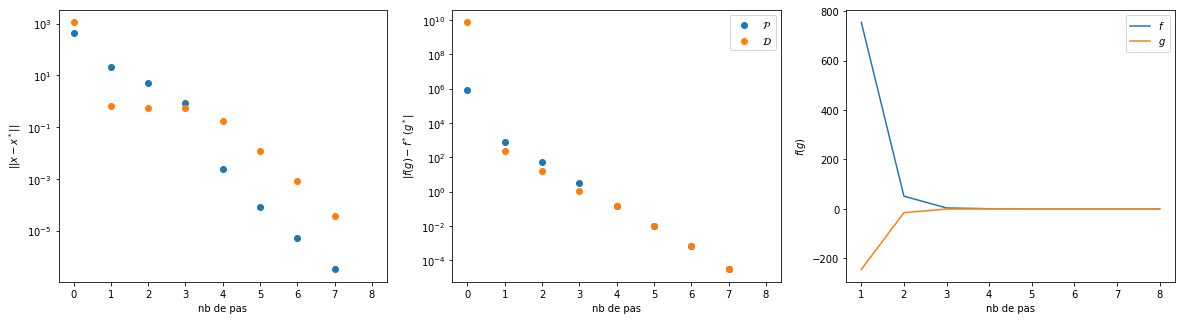

CPU times: user 35.5 s, sys: 32.6 s, total: 1min 8s
Wall time: 21.1 s
Le score est 1.0

classifieur SVM libstd
----------------------
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.17 ms
Le score est 1.0

Comparaison
-----------
||w-wSK|| = 0.000280199534821


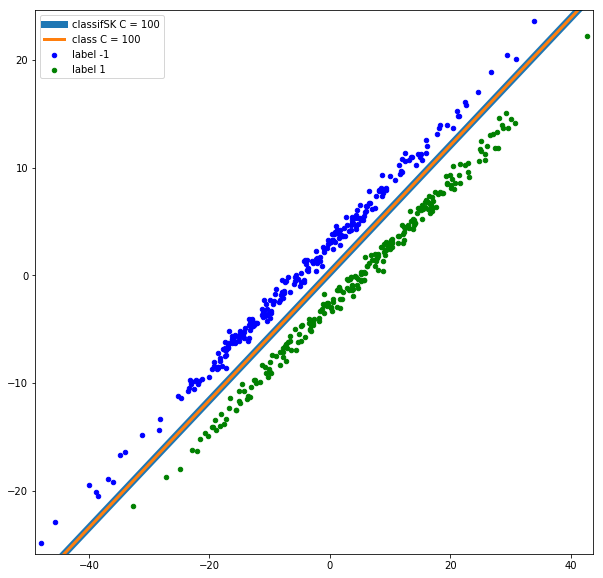

m = 600 :

classifieur SVM perso
---------------------
Convergence atteinte


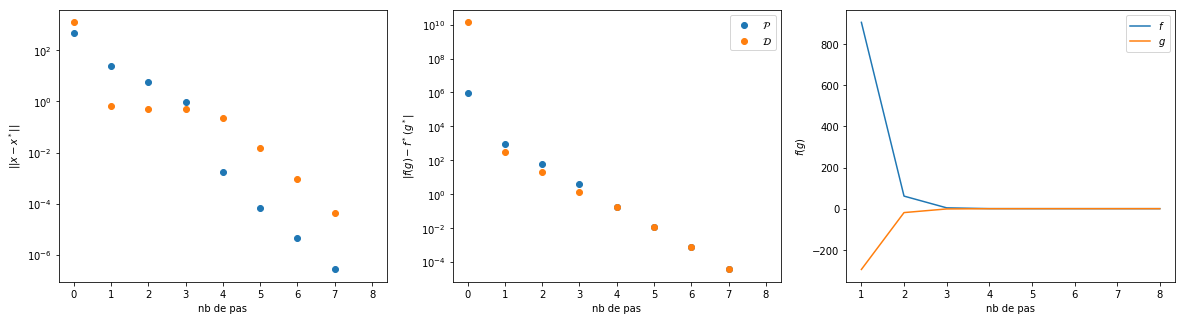

CPU times: user 58.2 s, sys: 42.4 s, total: 1min 40s
Wall time: 30.4 s
Le score est 1.0

classifieur SVM libstd
----------------------
CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 4.84 ms
Le score est 1.0

Comparaison
-----------
||w-wSK|| = 0.000495397267193


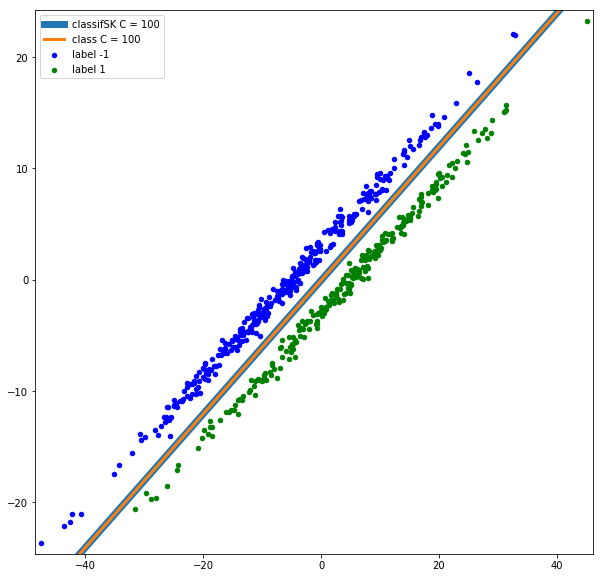

m = 700 :

classifieur SVM perso
---------------------
Convergence atteinte


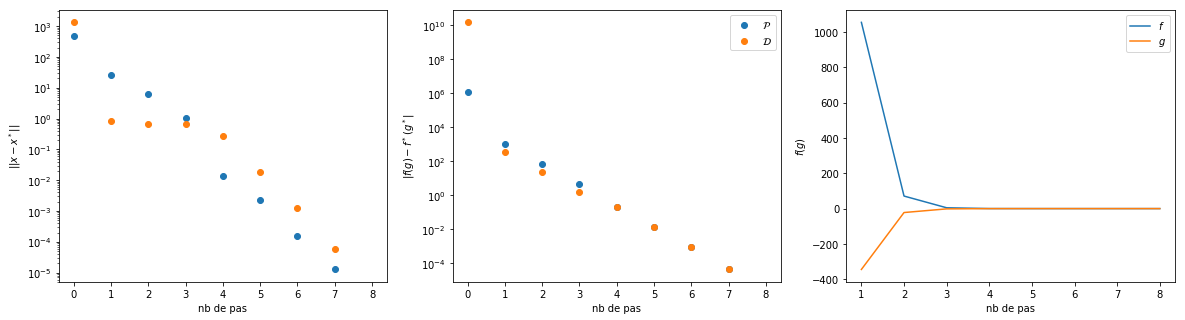

CPU times: user 1min 26s, sys: 55.8 s, total: 2min 22s
Wall time: 47.9 s
Le score est 1.0

classifieur SVM libstd
----------------------
CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 2.97 ms
Le score est 1.0

Comparaison
-----------
||w-wSK|| = 0.000263075044209


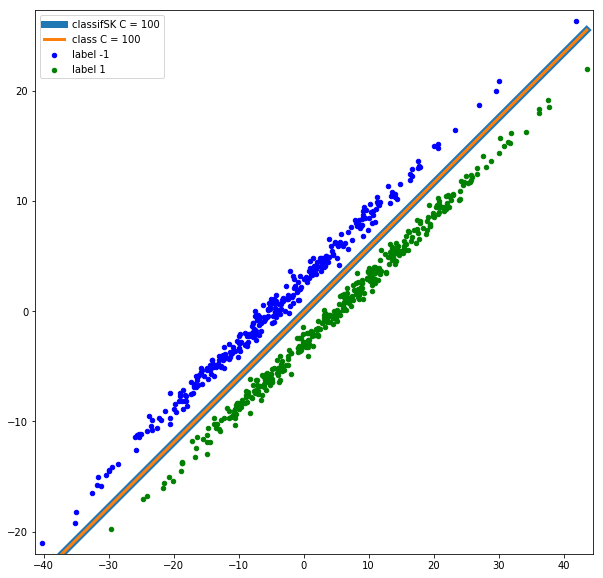

m = 800 :

classifieur SVM perso
---------------------
Convergence atteinte


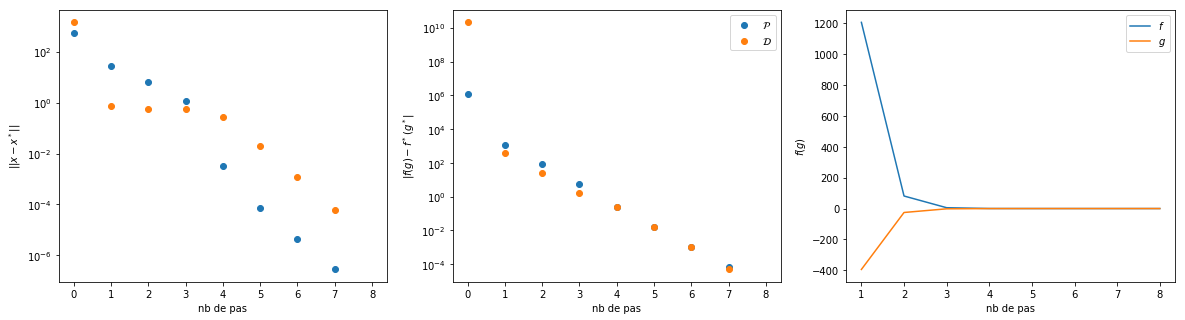

CPU times: user 1min 49s, sys: 1min 4s, total: 2min 54s
Wall time: 52.6 s
Le score est 1.0

classifieur SVM libstd
----------------------
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 3.47 ms
Le score est 1.0

Comparaison
-----------
||w-wSK|| = 0.000518164768534


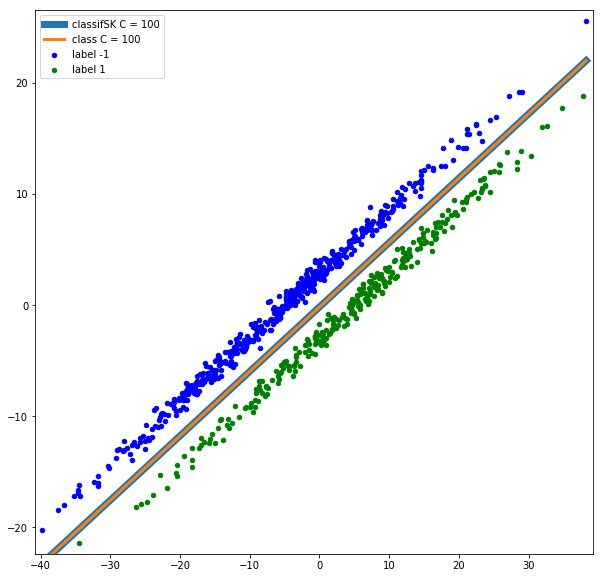

m = 900 :

classifieur SVM perso
---------------------
Convergence atteinte


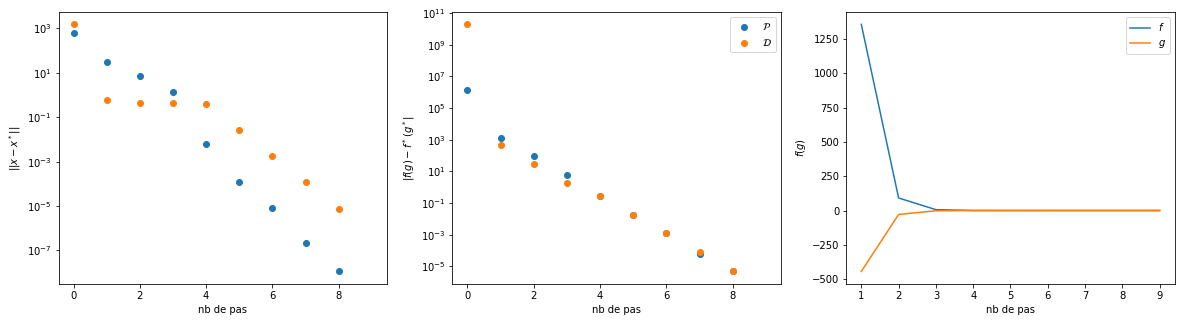

CPU times: user 2min 36s, sys: 1min 16s, total: 3min 52s
Wall time: 1min 10s
Le score est 1.0

classifieur SVM libstd
----------------------
CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 7.3 ms
Le score est 1.0

Comparaison
-----------
||w-wSK|| = 0.000581687149603


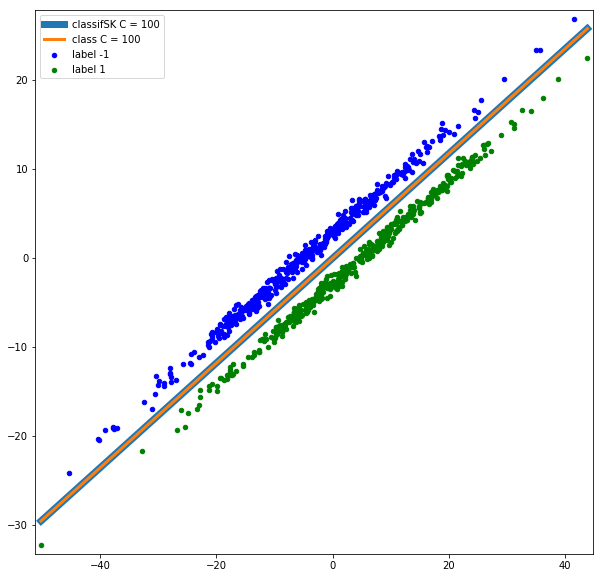

m = 1000 :

classifieur SVM perso
---------------------
Convergence atteinte


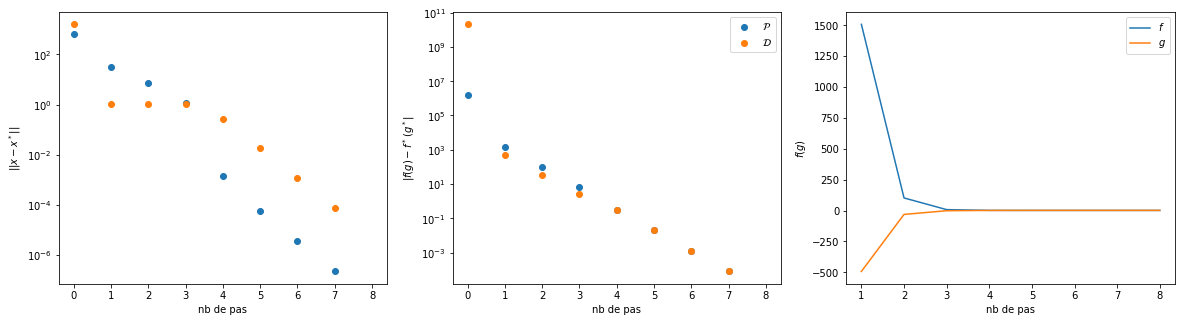

CPU times: user 3min 25s, sys: 1min 26s, total: 4min 51s
Wall time: 1min 30s
Le score est 1.0

classifieur SVM libstd
----------------------
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 6.2 ms
Le score est 1.0

Comparaison
-----------
||w-wSK|| = 0.000677563206034


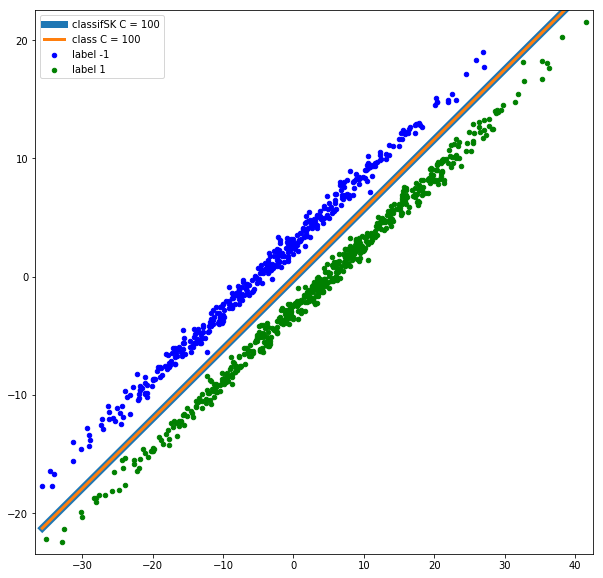

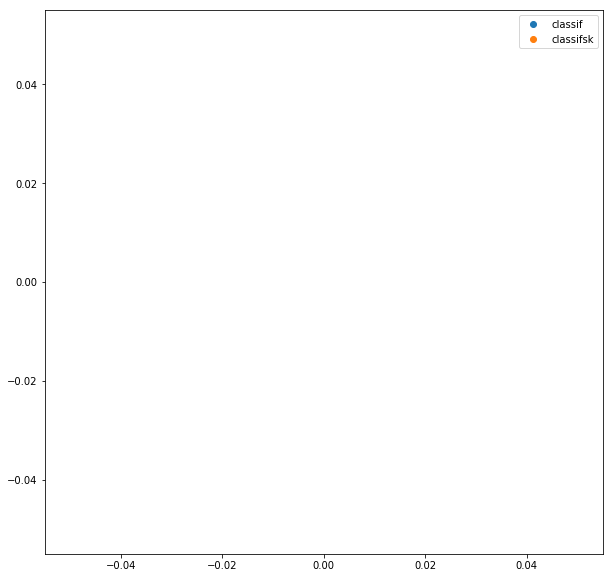

In [12]:
C = 100



def get_classSK(x, y, C):
    clf = svm.SVC(kernel='linear', C = C)
    newx = x[:,0:2]
    newy = np.reshape(y,(y.shape[0]))
    %time clf.fit(newx, newy)
    wSK = clf.coef_[0]
    wSK = np.array([[wSK[0]],[wSK[1]],[clf.intercept_[0]]])
    return wSK
    
# Le reste n'est qu'affichage
def printClassificateur(w,xmax,xmin,ymax,ymin,lgd):
    if w[1] != 0:
        xx = np.linspace(xmin, xmax, 100)
        a = w[0]/w[1]
        yy = -a*xx - w[2]/w[1]
        plt.plot(xx,yy,label=lgd,lw=len(lgd)-10)
    else:
        yy = np.linespace(ymin, ymax, 100)
        xx = (-w[2]/w[0])*np.ones(100)
        plt.plot(xx,yy,label=lgd,lw=len(lgd)-10)

def score(x,y,w_class):
    res = 0
    for i,pnt in enumerate(x):
        if np.sign(np.dot(pnt,w_class)) == np.sign(y[i]):
            res += 1
    return res/x.shape[0]

μ0 = np.array([-5, 0])
μ1 = np.array([5, 0])
σ = np.array([0.5,15])
Σ0 = R(2*np.pi/6)
Σ1 = R(2*np.pi/6)

        
        
T, Tsk = [], []
for m in range(100, 1001, 100):
    print("m = "+str(m)+str(" :"))
    print("=============")
    x, y, x0, x1 = tirerBench(m, σ, μ0, μ1, Σ0, Σ1)
    
    print("\nclassifieur SVM perso")
    print("---------------------")
    plt.rcParams["figure.figsize"] = (20,5)
    %time w = get_class(x, y, C, prnt = True)
    print("Le score est "+str(score(x,y,w)))
    # print("Classifieur calculé en "+str(dt)+" s.")
    #T += [dt]
    
    print("\nclassifieur SVM libstd")
    print("----------------------")
    wSK = get_classSK(x, y, C)
    print("Le score est "+str(score(x,y,wSK)))
    # print("Classifieur SK calculé en "+str(dt)+" s.")
    #Tsk += [dt]
    
    # On affiche les classifieurs
    print("\nComparaison")
    print("-----------")
    print("||w-wSK|| = "+str(np.linalg.norm(w-wSK)))
    
    plt.rcParams["figure.figsize"] = (10,10)
    xmin , xmax = np.min(x[:,0]) , np.max(x[:,0])
    ymin , ymax = np.min(x[:,1]) , np.max(x[:,1])
    
    plt.scatter(x0[:,0],x0[:,1],s=20,color="blue",label="label -1")
    plt.scatter(x1[:,0],x1[:,1],s=20,color="green",label="label 1")
    
    printClassificateur(wSK,xmax,xmin,ymax,ymin,"classifSK C = "+str(C))
    printClassificateur(w,xmax,xmin,ymax,ymin,"class C = "+str(C))

    plt.ylim(ymin-1,ymax+1)
    plt.xlim(xmin-1,xmax+1)
    plt.legend()
    plt.show()
    
plt.plot([a for a in range(len(T))],T,"o",label="classif")
plt.plot([a for a in range(len(T))],Tsk,"o",label="classifsk")
plt.legend()
plt.show()

In [11]:
def con():
    for i in range(1000000):
           a = np.random.normal(10)
x = %time con()


CPU times: user 1.79 s, sys: 40 ms, total: 1.83 s
Wall time: 1.77 s
